Исходные данные и точка прогноза:
+-------------+--------+--------+---------------+
| № точки     |   x(м) |   y(м) |   z(значение) |
+=============+========+========+===============+
| 1           |   0    |   1.87 |          6.81 |
+-------------+--------+--------+---------------+
| 2           |   0.71 |   4.75 |          7.17 |
+-------------+--------+--------+---------------+
| 3           |   1.43 |   3.66 |          7.35 |
+-------------+--------+--------+---------------+
| 4           |   2.14 |   2.99 |          8.07 |
+-------------+--------+--------+---------------+
| 5           |   2.86 |   0.78 |          8.34 |
+-------------+--------+--------+---------------+
| 6           |   3.57 |   0.78 |          8.37 |
+-------------+--------+--------+---------------+
| 7           |   4.29 |   0.29 |          8.73 |
+-------------+--------+--------+---------------+
| 8           |   5    |   4.33 |          8.91 |
+-------------+--------+--------+---------------+
| 9           | 

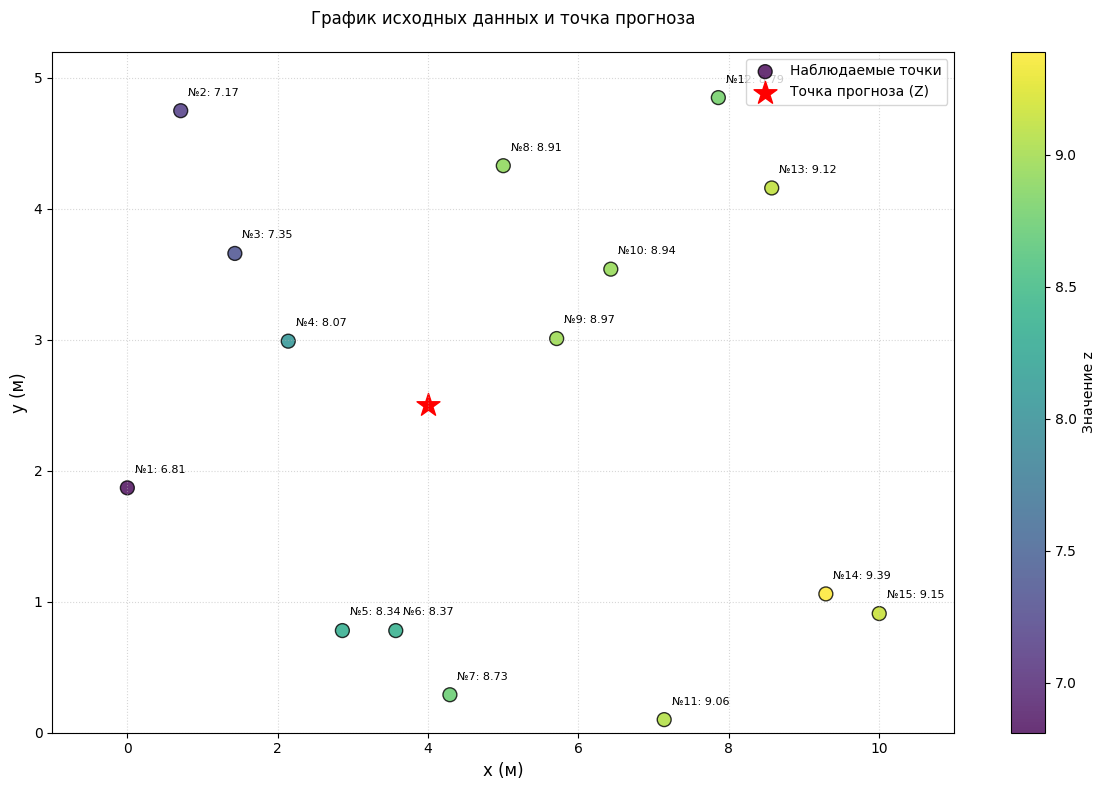

+-----------+--------------+---------+
|   Лаг (h) |   Кол-во пар |    γ(h) |
+===========+==============+=========+
|     0.558 |            6 | 0.13605 |
+-----------+--------------+---------+
|     1.675 |            6 | 0.04065 |
+-----------+--------------+---------+
|     2.792 |           19 | 0.41064 |
+-----------+--------------+---------+
|     3.909 |           25 | 0.74887 |
+-----------+--------------+---------+
|     5.026 |           13 | 1.38129 |
+-----------+--------------+---------+
|     6.143 |           19 | 1.27023 |
+-----------+--------------+---------+
|     7.26  |            6 | 2.6904  |
+-----------+--------------+---------+
|     8.377 |            6 | 3.65985 |
+-----------+--------------+---------+
|     9.494 |            5 | 4.84416 |
+-----------+--------------+---------+


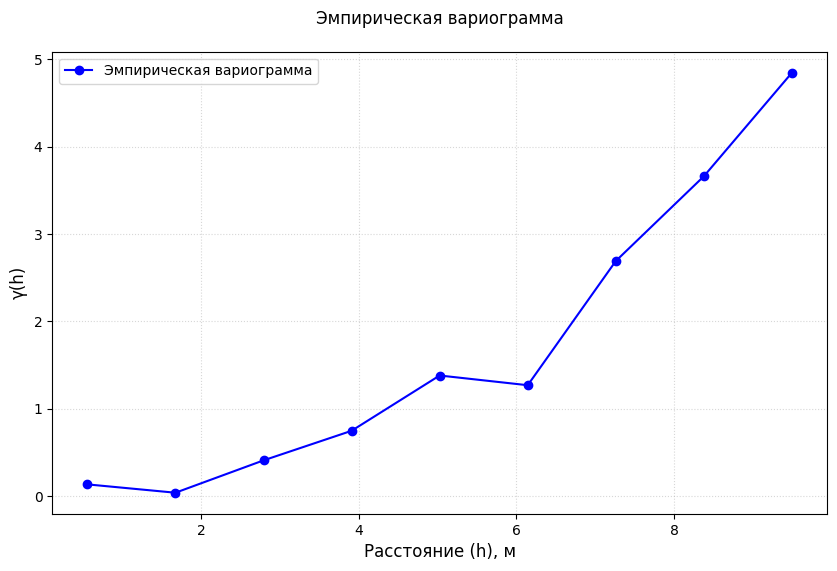

Оцененная линейная модель: γ(h) = 0.51885 * h - 0.92091
Дисперсия исходных данных = 0.59
Модель достигает дисперсии при h = 2.91 м
Радиус влияния: 2.91 м


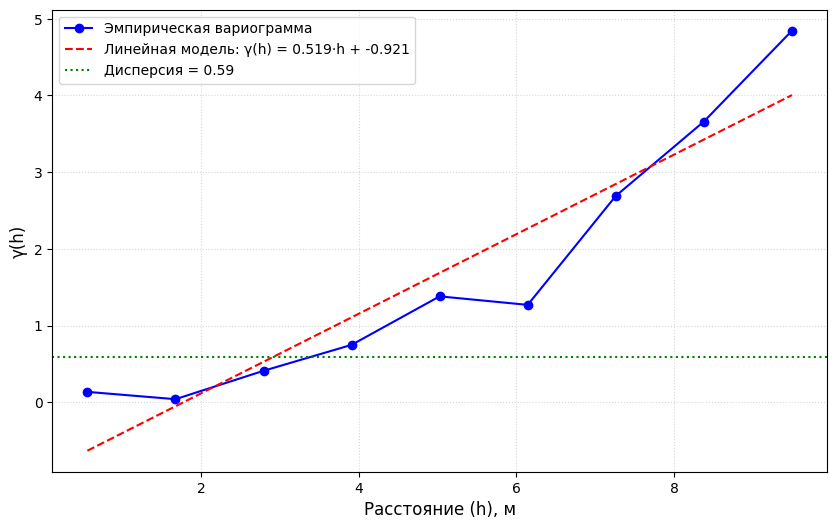


Весовые коэффициенты λ_j:
λ_1 = -0.041952
λ_2 = -0.007986
λ_3 = -0.001499
λ_4 = 0.290922
λ_5 = 0.049203
λ_6 = 0.239577
λ_7 = 0.050337
λ_8 = 0.187384
λ_9 = 0.316777
λ_10 = -0.048173
λ_11 = 0.005439
λ_12 = -0.023652
λ_13 = -0.004280
λ_14 = -0.001534
λ_15 = -0.010563

Множитель Лагранжа μ = 0.079226

Прогнозируемое значение в точке Z: 8.620527
Дисперсия ошибки кригинга: -0.069661

Сумма весов: 1.000000

Итоговые данные с прогнозом:
+-------------+--------+--------+---------------+
| № точки     |   x(м) |   y(м) |   z(значение) |
+=============+========+========+===============+
| 1           |   0    |   1.87 |       6.81    |
+-------------+--------+--------+---------------+
| 2           |   0.71 |   4.75 |       7.17    |
+-------------+--------+--------+---------------+
| 3           |   1.43 |   3.66 |       7.35    |
+-------------+--------+--------+---------------+
| 4           |   2.14 |   2.99 |       8.07    |
+-------------+--------+--------+---------------+
| 5           | 

In [46]:
#для линеййной модели
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.optimize import curve_fit
from numpy.linalg import solve

data = {
    "№ точки": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, "Z (прогноз)"],
    "x(м)": [0.0, 0.71, 1.43, 2.14, 2.86, 3.57, 4.29, 5.0, 5.71, 6.43, 7.14, 7.86, 8.57, 9.29, 10.0, 4.0],
    "y(м)": [1.87, 4.75, 3.66, 2.99, 0.78, 0.78, 0.29, 4.33, 3.01, 3.54, 0.1, 4.85, 4.16, 1.06, 0.91, 2.5],
    "z(значение)": [6.81, 7.17, 7.35, 8.07, 8.34, 8.37, 8.73, 8.91, 8.97, 8.94, 9.06, 8.79, 9.12, 9.39, 9.15, None]
}

df = pd.DataFrame(data)

print("Исходные данные и точка прогноза:")
print(tabulate(df, headers='keys', tablefmt='grid', showindex=False, missingval="nan"))

plt.figure(figsize=(12, 8))

# Наблюдаемые точки
observed = df.iloc[:-1]
scatter = plt.scatter(observed["x(м)"], observed["y(м)"], 
                     c=observed["z(значение)"], cmap='viridis', 
                     s=100, edgecolor='k', alpha=0.8, label='Наблюдаемые точки')

# Точка прогноза
prediction = df.iloc[-1:]
plt.scatter(prediction["x(м)"], prediction["y(м)"], 
            c='red', marker='*', s=300, label='Точка прогноза (Z)')

for _, row in observed.iterrows():
    plt.text(row["x(м)"] + 0.1, row["y(м)"] + 0.1,
             f'№{row["№ точки"]}: {row["z(значение)"]}', 
             fontsize=8, ha='left', va='bottom')

plt.colorbar(scatter, label='Значение z')
plt.xlabel('x (м)', fontsize=12)
plt.ylabel('y (м)', fontsize=12)
plt.title('График исходных данных и точка прогноза', pad=20)
plt.grid(ls=':', alpha=0.5)
plt.legend(loc='upper right')

plt.xlim(-1, 11)
plt.ylim(0, 5.2)

plt.tight_layout()
plt.show()

# Эмпирическая вариограмма
observed = df.iloc[:-1]  # Исключаем точку прогноза
coords = observed[["x(м)", "y(м)"]].values
z_values = observed["z(значение)"].values

# Вычисляем матрицу расстояний
dist_matrix = squareform(pdist(coords, 'euclidean'))

# Вычисляем матрицу квадратов разностей z
z_diff_matrix = np.zeros_like(dist_matrix)
for i in range(len(z_values)):
    for j in range(len(z_values)):
        z_diff_matrix[i, j] = (z_values[i] - z_values[j]) ** 2

# Автоматическое разбиение на 10 интервалов
max_distance = np.max(dist_matrix)
lag_bins = np.linspace(0, max_distance, 10)

gamma = []
h_lags = []
n_pairs = []

for i in range(len(lag_bins) - 1):
    h_min = lag_bins[i]
    h_max = lag_bins[i + 1]
    mask = (dist_matrix > h_min) & (dist_matrix <= h_max)
    N_h = np.sum(mask) / 2  # Учитываем только верхний треугольник матрицы
    
    if N_h > 0:
        gamma_h = np.sum(z_diff_matrix[mask]) / (2 * N_h)
        gamma.append(gamma_h)
        h_lags.append((h_min + h_max) / 2)  # Среднее значение лага
        n_pairs.append(N_h)

table_data = []
for i in range(len(h_lags)):
    table_data.append([round(h_lags[i], 3), int(n_pairs[i]), round(gamma[i], 5)])

print(tabulate(table_data, headers=["Лаг (h)", "Кол-во пар", "γ(h)"], tablefmt="grid"))

# График вариограммы
plt.figure(figsize=(10, 6))
plt.plot(h_lags, gamma, 'bo-', label='Эмпирическая вариограмма')
plt.xlabel('Расстояние (h), м', fontsize=12)
plt.ylabel('γ(h)', fontsize=12)
plt.title('Эмпирическая вариограмма', pad=20)
plt.grid(ls=':', alpha=0.5)
plt.legend()
plt.show()

# Строим линейную модель
def linear_model(h, a, b):
    return a * h + b

h_lags_np = np.array(h_lags)
gamma_np = np.array(gamma)
params, covariance = curve_fit(linear_model, h_lags_np, gamma_np)
a_est, b_est = params

sign = '+' if b_est >= 0 else '-'
print(f"Оцененная линейная модель: γ(h) = {a_est:.5f} * h {sign} {abs(b_est):.5f}")

# Проверяем условие отсутствия касания с линией дисперсии
sigma_sq = np.var(z_values)
print(f"Дисперсия исходных данных = {sigma_sq:.2f}")

# Для линейной модели проверяем, достигает ли она дисперсии
max_h = max(h_lags)
max_gamma = linear_model(max_h, a_est, b_est)

if max_gamma >= sigma_sq:
    # Находим точку пересечения
    h_intersect = (sigma_sq - b_est) / a_est
    print(f"Модель достигает дисперсии при h = {h_intersect:.2f} м")
    print(f"Радиус влияния: {h_intersect:.2f} м")
else:
    print("Модель не достигает дисперсии в пределах рассмотренных лагов.")

plt.figure(figsize=(10, 6))
plt.plot(h_lags, gamma, 'bo-', label='Эмпирическая вариограмма')
plt.plot(h_lags_np, linear_model(h_lags_np, a_est, b_est), 'r--', 
         label=f'Линейная модель: γ(h) = {a_est:.3f}·h + {b_est:.3f}')
plt.axhline(y=sigma_sq, color='g', linestyle=':', label=f'Дисперсия = {sigma_sq:.2f}')
plt.xlabel('Расстояние (h), м', fontsize=12)
plt.ylabel('γ(h)', fontsize=12)
plt.grid(ls=':', alpha=0.5)
plt.legend()
plt.show()

# Кригинг с линейной моделью вариограммы
target_point = np.array([4.0, 2.5])  # точка Z

# Расстояния от точек до Z
dist_to_target = np.array([np.linalg.norm(coord - target_point) for coord in coords])

# Ковариационная функция: C(h) = D - γ(h)
def covariance_func(h):
    return sigma_sq - linear_model(h, a_est, b_est)

# Матрица системы
n = len(coords)
A = np.zeros((n + 1, n + 1))
for i in range(n):
    for j in range(n):
        A[i, j] = covariance_func(dist_matrix[i, j])

# Условие Σλ_j = 1
A[-1, :n] = 1.0
A[:n, -1] = 1.0

# Правая часть
b = np.zeros(n + 1)
b[:n] = covariance_func(dist_to_target)
b[-1] = 1.0

solution = solve(A, b)
lambda_j = solution[:n]
mu = solution[-1] 

# Прогноз и ошибка
z_pred = np.sum(lambda_j * z_values)
kriging_variance = sigma_sq - np.sum(lambda_j * covariance_func(dist_to_target))

# Обновляем DataFrame
df.loc[df["№ точки"] == "Z (прогноз)", "z(значение)"] = z_pred

# Вывод результатов
print("\nВесовые коэффициенты λ_j:")
for i in range(n):
    print(f"λ_{i+1} = {lambda_j[i]:.6f}")
print(f"\nМножитель Лагранжа μ = {mu:.6f}")
print(f"\nПрогнозируемое значение в точке Z: {z_pred:.6f}")
print(f"Дисперсия ошибки кригинга: {kriging_variance:.6f}")

# Проверка суммы весов
print(f"\nСумма весов: {np.sum(lambda_j):.6f}")

# Выводим обновленную таблицу с прогнозом
print("\nИтоговые данные с прогнозом:")
print(tabulate(df, headers='keys', tablefmt='grid', showindex=False, missingval="nan"))

Исходные данные и точка прогноза:
+-------------+--------+--------+---------------+
| № точки     |   x(м) |   y(м) |   z(значение) |
+=============+========+========+===============+
| 1           |   0    |   1.87 |          6.81 |
+-------------+--------+--------+---------------+
| 2           |   0.71 |   4.75 |          7.17 |
+-------------+--------+--------+---------------+
| 3           |   1.43 |   3.66 |          7.35 |
+-------------+--------+--------+---------------+
| 4           |   2.14 |   2.99 |          8.07 |
+-------------+--------+--------+---------------+
| 5           |   2.86 |   0.78 |          8.34 |
+-------------+--------+--------+---------------+
| 6           |   3.57 |   0.78 |          8.37 |
+-------------+--------+--------+---------------+
| 7           |   4.29 |   0.29 |          8.73 |
+-------------+--------+--------+---------------+
| 8           |   5    |   4.33 |          8.91 |
+-------------+--------+--------+---------------+
| 9           | 

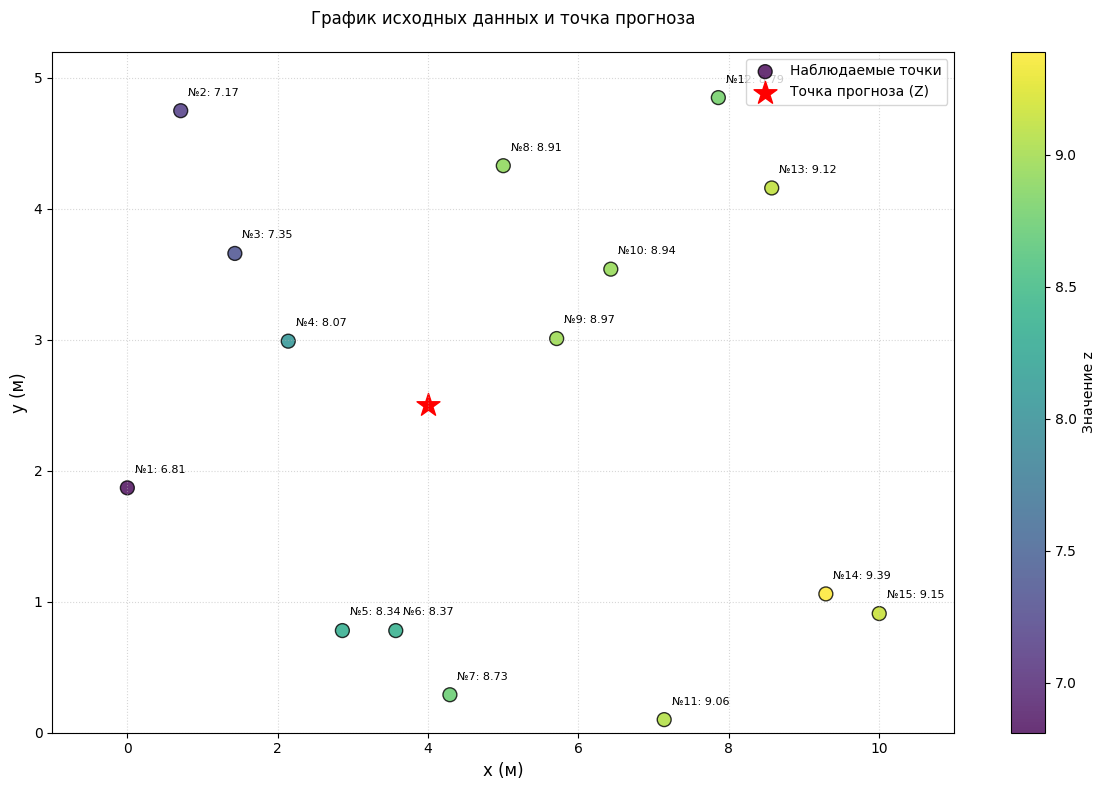

+-----------+--------------+---------+
|   Лаг (h) |   Кол-во пар |    γ(h) |
+===========+==============+=========+
|     0.718 |            7 | 0.12124 |
+-----------+--------------+---------+
|     2.154 |           13 | 0.25491 |
+-----------+--------------+---------+
|     3.59  |           30 | 0.48486 |
+-----------+--------------+---------+
|     5.026 |           22 | 1.38559 |
+-----------+--------------+---------+
|     6.462 |           20 | 1.49108 |
+-----------+--------------+---------+
|     7.898 |            7 | 3.34684 |
+-----------+--------------+---------+
|     9.334 |            6 | 4.92615 |
+-----------+--------------+---------+


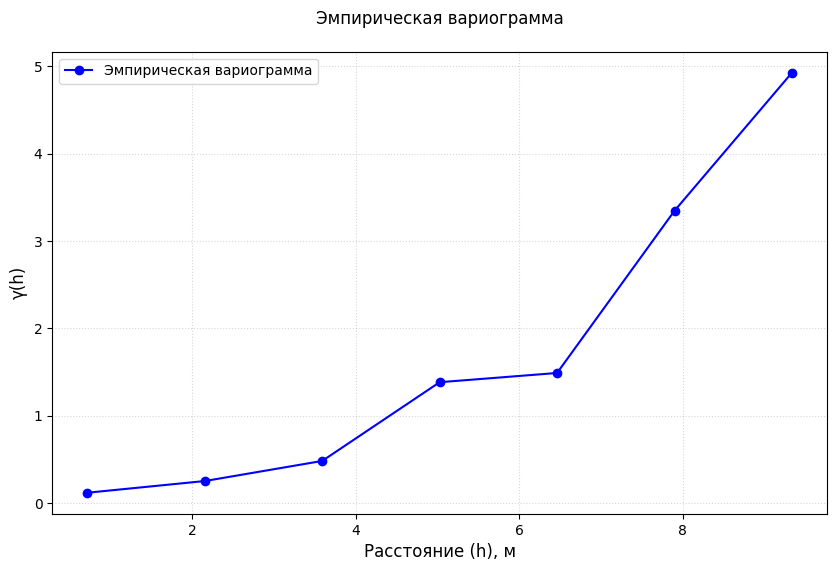

Сферическая модель: γ(h) = -0.985 + 16386.382*(1.5h/45745.823 - 0.5(h/45745.823)^3) для h ≤ 45745.823
Дисперсия исходных данных = 0.59

Радиус влияния (из параметра модели a) = 45745.823 м


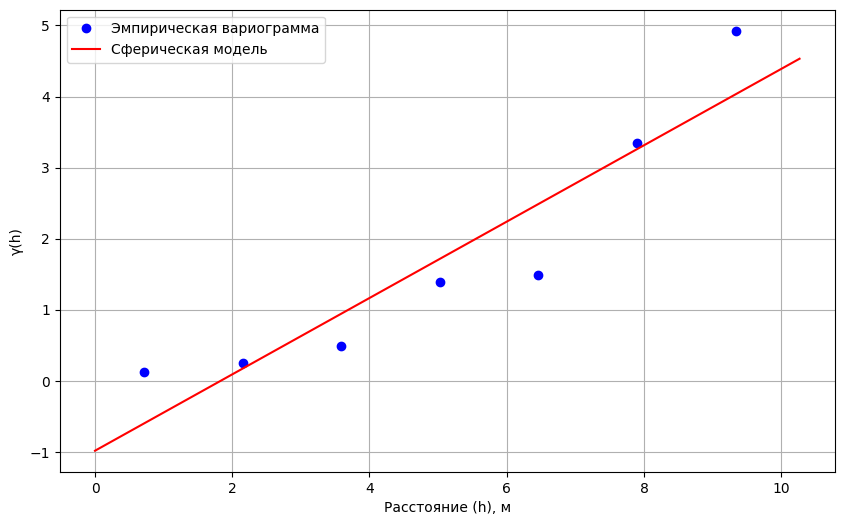


Весовые коэффициенты λ_j:
λ_1 = -0.041952
λ_2 = -0.007986
λ_3 = -0.001499
λ_4 = 0.290922
λ_5 = 0.049203
λ_6 = 0.239577
λ_7 = 0.050337
λ_8 = 0.187384
λ_9 = 0.316777
λ_10 = -0.048173
λ_11 = 0.005439
λ_12 = -0.023652
λ_13 = -0.004280
λ_14 = -0.001534
λ_15 = -0.010563

Множитель Лагранжа μ = 0.082044

Прогнозируемое значение в точке Z: 8.620527
Дисперсия ошибки кригинга: -0.103251

Сумма весов: 1.000000

Итоговые данные с прогнозом:
+-------------+--------+--------+---------------+
| № точки     |   x(м) |   y(м) |   z(значение) |
+=============+========+========+===============+
| 1           |   0    |   1.87 |       6.81    |
+-------------+--------+--------+---------------+
| 2           |   0.71 |   4.75 |       7.17    |
+-------------+--------+--------+---------------+
| 3           |   1.43 |   3.66 |       7.35    |
+-------------+--------+--------+---------------+
| 4           |   2.14 |   2.99 |       8.07    |
+-------------+--------+--------+---------------+
| 5           | 

In [47]:
#для сферической модели
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.optimize import curve_fit
from numpy.linalg import solve

data = {
    "№ точки": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, "Z (прогноз)"],
    "x(м)": [0.0, 0.71, 1.43, 2.14, 2.86, 3.57, 4.29, 5.0, 5.71, 6.43, 7.14, 7.86, 8.57, 9.29, 10.0, 4.0],
    "y(м)": [1.87, 4.75, 3.66, 2.99, 0.78, 0.78, 0.29, 4.33, 3.01, 3.54, 0.1, 4.85, 4.16, 1.06, 0.91, 2.5],
    "z(значение)": [6.81, 7.17, 7.35, 8.07, 8.34, 8.37, 8.73, 8.91, 8.97, 8.94, 9.06, 8.79, 9.12, 9.39, 9.15, None]
}

df = pd.DataFrame(data)

print("Исходные данные и точка прогноза:")
print(tabulate(df, headers='keys', tablefmt='grid', showindex=False, missingval="nan"))

plt.figure(figsize=(12, 8))

# Наблюдаемые точки
observed = df.iloc[:-1]
scatter = plt.scatter(observed["x(м)"], observed["y(м)"], 
                     c=observed["z(значение)"], cmap='viridis', 
                     s=100, edgecolor='k', alpha=0.8, label='Наблюдаемые точки')

# Точка прогноза
prediction = df.iloc[-1:]
plt.scatter(prediction["x(м)"], prediction["y(м)"], 
            c='red', marker='*', s=300, label='Точка прогноза (Z)')

for _, row in observed.iterrows():
    plt.text(row["x(м)"] + 0.1, row["y(м)"] + 0.1,
             f'№{row["№ точки"]}: {row["z(значение)"]}', 
             fontsize=8, ha='left', va='bottom')

plt.colorbar(scatter, label='Значение z')
plt.xlabel('x (м)', fontsize=12)
plt.ylabel('y (м)', fontsize=12)
plt.title('График исходных данных и точка прогноза', pad=20)
plt.grid(ls=':', alpha=0.5)
plt.legend(loc='upper right')

plt.xlim(-1, 11)
plt.ylim(0, 5.2)

plt.tight_layout()
plt.show()

# Эмпирическая вариограмма
observed = df.iloc[:-1]  # Исключаем точку прогноза
coords = observed[["x(м)", "y(м)"]].values
z_values = observed["z(значение)"].values

# Вычисляем матрицу расстояний
dist_matrix = squareform(pdist(coords, 'euclidean'))

# Вычисляем матрицу квадратов разностей z
z_diff_matrix = np.zeros_like(dist_matrix)
for i in range(len(z_values)):
    for j in range(len(z_values)):
        z_diff_matrix[i, j] = (z_values[i] - z_values[j]) ** 2

# Автоматическое разбиение на 10 интервалов
max_distance = np.max(dist_matrix)
lag_bins = np.linspace(0, max_distance, 8)

gamma = []
h_lags = []
n_pairs = []

for i in range(len(lag_bins) - 1):
    h_min = lag_bins[i]
    h_max = lag_bins[i + 1]
    mask = (dist_matrix > h_min) & (dist_matrix <= h_max)
    N_h = np.sum(mask) / 2  # Учитываем только верхний треугольник матрицы
    
    if N_h > 0:
        gamma_h = np.sum(z_diff_matrix[mask]) / (2 * N_h)
        gamma.append(gamma_h)
        h_lags.append((h_min + h_max) / 2)  # Среднее значение лага
        n_pairs.append(N_h)

table_data = []
for i in range(len(h_lags)):
    table_data.append([round(h_lags[i], 3), int(n_pairs[i]), round(gamma[i], 5)])

print(tabulate(table_data, headers=["Лаг (h)", "Кол-во пар", "γ(h)"], tablefmt="grid"))

# График вариограммы
plt.figure(figsize=(10, 6))
plt.plot(h_lags, gamma, 'bo-', label='Эмпирическая вариограмма')
plt.xlabel('Расстояние (h), м', fontsize=12)
plt.ylabel('γ(h)', fontsize=12)
plt.title('Эмпирическая вариограмма', pad=20)
plt.grid(ls=':', alpha=0.5)
plt.legend()
plt.show()

# Сферическая модель вариограммы
def spherical_model(h, c0, c, a):
    return np.where(
        h <= a,
        c0 + c * (1.5 * h / a - 0.5 * (h / a)**3),
        c0 + c
    )

# Подбираем параметры модели
h_lags_np = np.array(h_lags)
gamma_np = np.array(gamma)

# Начальные приближения: c0 (nugget), c (partial sill), a (range)
initial_guess = [0.1, 10, 5]  
params, _ = curve_fit(spherical_model, h_lags_np, gamma_np, p0=initial_guess)
c0, c, a = params

print(f"Сферическая модель: γ(h) = {c0:.3f} + {c:.3f}*(1.5h/{a:.3f} - 0.5(h/{a:.3f})^3) для h ≤ {a:.3f}")

#Проверяем условие отсутствия касания с линией дисперсии
sigma_sq = np.var(z_values)
print(f"Дисперсия исходных данных = {sigma_sq:.2f}")

# Радиус влияния (уже определен в параметре a сферической модели)
print(f"\nРадиус влияния (из параметра модели a) = {a:.3f} м")

# Визуализация модели
h_pred = np.linspace(0, max(h_lags)*1.1, 100)
plt.figure(figsize=(10, 6))
plt.plot(h_lags, gamma, 'bo', label='Эмпирическая вариограмма')
plt.plot(h_pred, spherical_model(h_pred, c0, c, a), 'r-', label='Сферическая модель')
plt.xlabel('Расстояние (h), м')
plt.ylabel('γ(h)')
plt.legend()
plt.grid(True)
plt.show()

# Кригинг со сферической моделью
target_point = np.array([4.0, 2.5])  # точка Z

# Расстояния от точек до Z
dist_to_target = np.array([np.linalg.norm(coord - target_point) for coord in coords])

# Ковариационная функция: C(h) = C(0) - γ(h), где C(0) = c0 + c
def covariance_func(h):
    return (c0 + c) - spherical_model(h, c0, c, a)

# Матрица системы
n = len(coords)
A = np.zeros((n + 1, n + 1))
for i in range(n):
    for j in range(n):
        A[i, j] = covariance_func(dist_matrix[i, j])

# Условие Σλ_j = 1
A[-1, :n] = 1.0
A[:n, -1] = 1.0

# Правая часть
b = np.zeros(n + 1)
b[:n] = covariance_func(dist_to_target)
b[-1] = 1.0

solution = solve(A, b)
lambda_j = solution[:n]
mu = solution[-1] 

# Прогноз и ошибка
z_pred = np.sum(lambda_j * z_values)
kriging_variance = (c0 + c) - np.sum(lambda_j * covariance_func(dist_to_target))

# Обновляем DataFrame
df.loc[df["№ точки"] == "Z (прогноз)", "z(значение)"] = z_pred

# Вывод результатов
print("\nВесовые коэффициенты λ_j:")
for i in range(n):
    print(f"λ_{i+1} = {lambda_j[i]:.6f}")
print(f"\nМножитель Лагранжа μ = {mu:.6f}")
print(f"\nПрогнозируемое значение в точке Z: {z_pred:.6f}")
print(f"Дисперсия ошибки кригинга: {kriging_variance:.6f}")

# Проверка суммы весов
print(f"\nСумма весов: {np.sum(lambda_j):.6f}")

# Выводим обновленную таблицу с прогнозом
print("\nИтоговые данные с прогнозом:")
print(tabulate(df, headers='keys', tablefmt='grid', showindex=False, missingval="nan"))

Исходные данные и точка прогноза:
+-------------+--------+--------+---------------+
| № точки     |   x(м) |   y(м) |   z(значение) |
+=============+========+========+===============+
| 1           |   0    |   1.87 |          6.81 |
+-------------+--------+--------+---------------+
| 2           |   0.71 |   4.75 |          7.17 |
+-------------+--------+--------+---------------+
| 3           |   1.43 |   3.66 |          7.35 |
+-------------+--------+--------+---------------+
| 4           |   2.14 |   2.99 |          8.07 |
+-------------+--------+--------+---------------+
| 5           |   2.86 |   0.78 |          8.34 |
+-------------+--------+--------+---------------+
| 6           |   3.57 |   0.78 |          8.37 |
+-------------+--------+--------+---------------+
| 7           |   4.29 |   0.29 |          8.73 |
+-------------+--------+--------+---------------+
| 8           |   5    |   4.33 |          8.91 |
+-------------+--------+--------+---------------+
| 9           | 

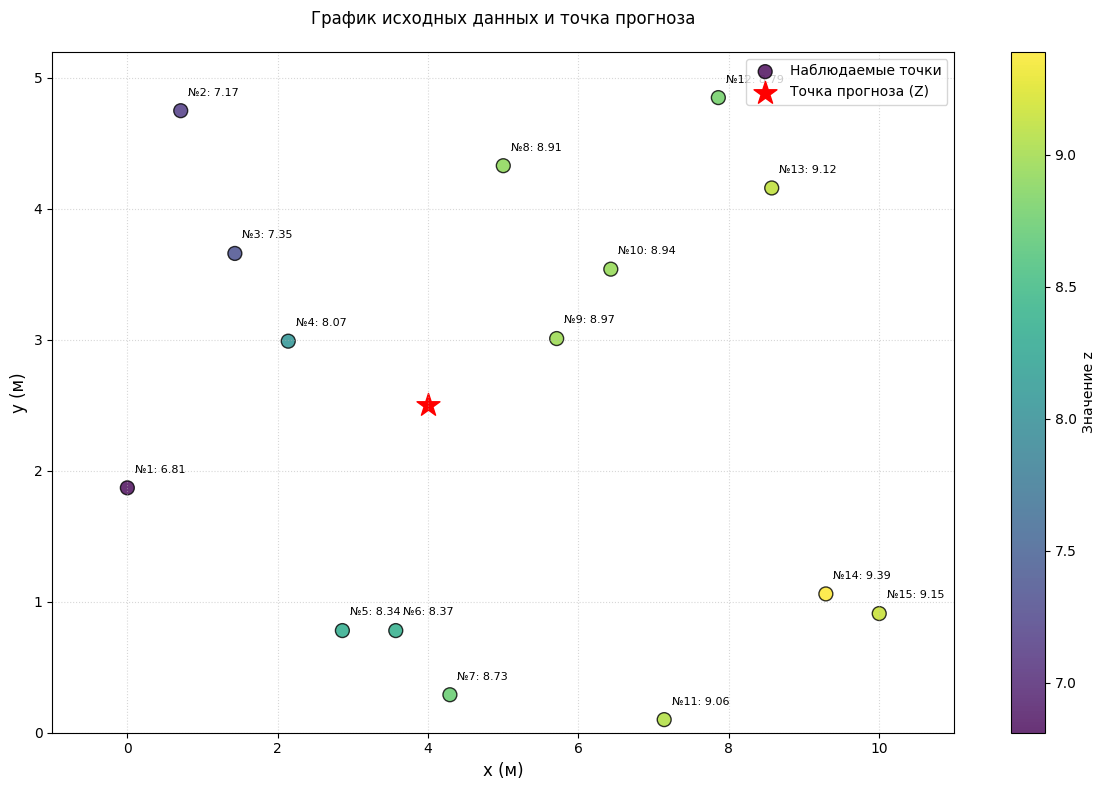

+-----------+--------------+---------+
|   Лаг (h) |   Кол-во пар |    γ(h) |
+===========+==============+=========+
|     0.558 |            6 | 0.13605 |
+-----------+--------------+---------+
|     1.675 |            6 | 0.04065 |
+-----------+--------------+---------+
|     2.792 |           19 | 0.41064 |
+-----------+--------------+---------+
|     3.909 |           25 | 0.74887 |
+-----------+--------------+---------+
|     5.026 |           13 | 1.38129 |
+-----------+--------------+---------+
|     6.143 |           19 | 1.27023 |
+-----------+--------------+---------+
|     7.26  |            6 | 2.6904  |
+-----------+--------------+---------+
|     8.377 |            6 | 3.65985 |
+-----------+--------------+---------+
|     9.494 |            5 | 4.84416 |
+-----------+--------------+---------+


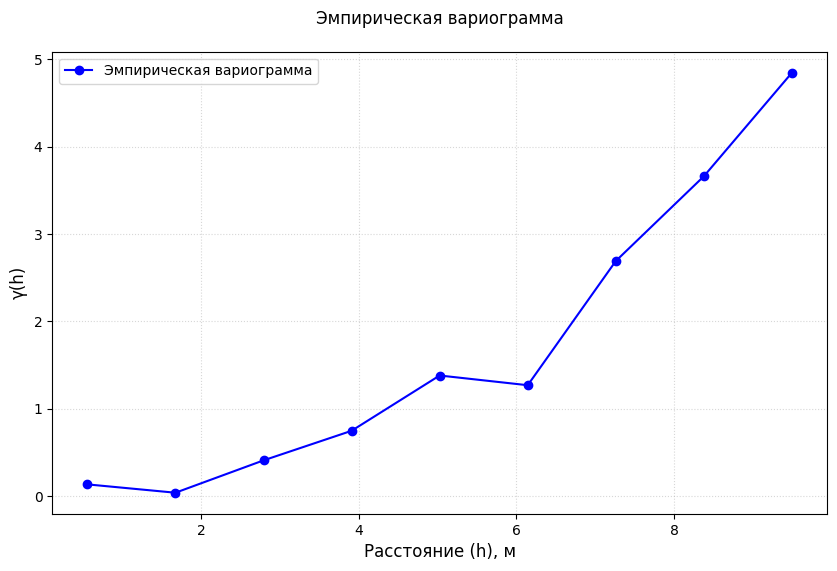

Кубическая модель: γ(h) = 0.034 + 0.064h + 0.011h² + 0.004h³
Дисперсия исходных данных = 0.59
Радиус влияния: 3.60 м


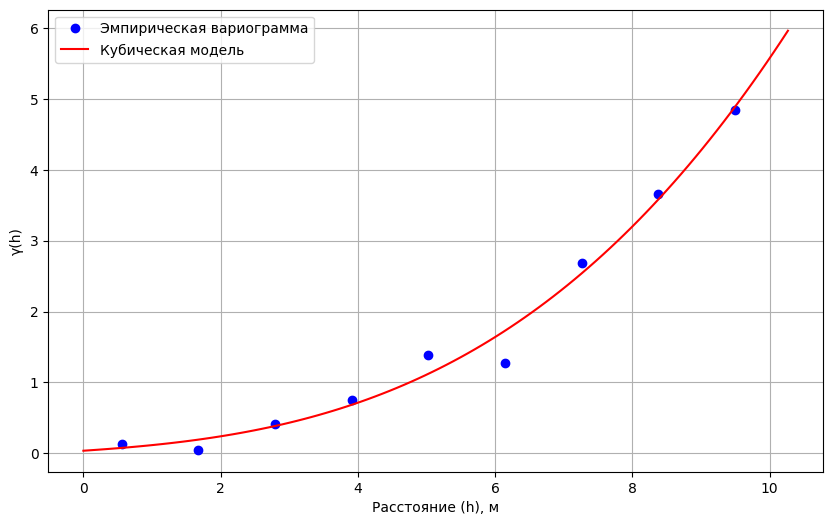

Весовые коэффициенты p_j:
p_1 = -5.113105
p_2 = 0.680396
p_3 = 0.590233
p_4 = 2.031491
p_5 = 4.252368
p_6 = 1.262616
p_7 = 3.376748
p_8 = 2.351751
p_9 = -2.826412
p_10 = -4.318723
p_11 = -2.960137
p_12 = 2.861011
p_13 = -1.216195
p_14 = -5.452648
p_15 = 5.480607

Множитель Лагранжа μ = -2.024695

Прогнозируемое значение в точке Z: 9.479124
Дисперсия ошибки кригинга: 1.768258

Сумма весов: 1.000000

Итоговые данные с прогнозом:
+-------------+--------+--------+---------------+
| № точки     |   x(м) |   y(м) |   z(значение) |
+=============+========+========+===============+
| 1           |   0    |   1.87 |       6.81    |
+-------------+--------+--------+---------------+
| 2           |   0.71 |   4.75 |       7.17    |
+-------------+--------+--------+---------------+
| 3           |   1.43 |   3.66 |       7.35    |
+-------------+--------+--------+---------------+
| 4           |   2.14 |   2.99 |       8.07    |
+-------------+--------+--------+---------------+
| 5           |   2

In [55]:
#итоговый код для кубической
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.optimize import curve_fit

data = {
    "№ точки": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, "Z (прогноз)"],
    "x(м)": [0.0, 0.71, 1.43, 2.14, 2.86, 3.57, 4.29, 5.0, 5.71, 6.43, 7.14, 7.86, 8.57, 9.29, 10.0, 4.0],
    "y(м)": [1.87, 4.75, 3.66, 2.99, 0.78, 0.78, 0.29, 4.33, 3.01, 3.54, 0.1, 4.85, 4.16, 1.06, 0.91, 2.5],
    "z(значение)": [6.81, 7.17, 7.35, 8.07, 8.34, 8.37, 8.73, 8.91, 8.97, 8.94, 9.06, 8.79, 9.12, 9.39, 9.15, None]
}

df = pd.DataFrame(data)

print("Исходные данные и точка прогноза:")
print(tabulate(df, headers='keys', tablefmt='grid', showindex=False, missingval="nan"))

plt.figure(figsize=(12, 8))

observed = df.iloc[:-1]
scatter = plt.scatter(observed["x(м)"], observed["y(м)"], 
                     c=observed["z(значение)"], cmap='viridis', 
                     s=100, edgecolor='k', alpha=0.8, label='Наблюдаемые точки')

prediction = df.iloc[-1:]
plt.scatter(prediction["x(м)"], prediction["y(м)"], 
            c='red', marker='*', s=300, label='Точка прогноза (Z)')

for _, row in observed.iterrows():
    plt.text(row["x(м)"] + 0.1, row["y(м)"] + 0.1,
             f'№{row["№ точки"]}: {row["z(значение)"]}', 
             fontsize=8, ha='left', va='bottom')

plt.colorbar(scatter, label='Значение z')
plt.xlabel('x (м)', fontsize=12)
plt.ylabel('y (м)', fontsize=12)
plt.title('График исходных данных и точка прогноза', pad=20)
plt.grid(ls=':', alpha=0.5)
plt.legend(loc='upper right')

plt.xlim(-1, 11)
plt.ylim(0, 5.2)

plt.tight_layout()
plt.show()

#эмпирическая вариограмма
observed = df.iloc[:-1]  # исключаем точку прогноза
coords = observed[["x(м)", "y(м)"]].values
z_values = observed["z(значение)"].values

#вычисляем матрицу расстояний
dist_matrix = squareform(pdist(coords, 'euclidean'))

#Вычисляем матрицу квадратов разностей z
z_diff_matrix = np.zeros_like(dist_matrix)
for i in range(len(z_values)):
    for j in range(len(z_values)):
        z_diff_matrix[i, j] = (z_values[i] - z_values[j]) ** 2

#автоматическое разбиение на 10 интервалов
max_distance = np.max(dist_matrix)
lag_bins = np.linspace(0, max_distance, 10)

gamma = []
h_lags = []
n_pairs = []

for i in range(len(lag_bins) - 1):
    h_min = lag_bins[i]
    h_max = lag_bins[i + 1]
    mask = (dist_matrix > h_min) & (dist_matrix <= h_max)
    N_h = np.sum(mask) / 2  # учитываем только верхний треугольник матрицы
    
    if N_h > 0:
        gamma_h = np.sum(z_diff_matrix[mask]) / (2 * N_h)
        gamma.append(gamma_h)
        h_lags.append((h_min + h_max) / 2)
        n_pairs.append(N_h)

table_data = []
for i in range(len(h_lags)):
    table_data.append([round(h_lags[i], 3), int(n_pairs[i]), round(gamma[i], 5)])

print(tabulate(table_data, headers=["Лаг (h)", "Кол-во пар", "γ(h)"], tablefmt="grid"))

#график вариограммы
plt.figure(figsize=(10, 6))
plt.plot(h_lags, gamma, 'bo-', label='Эмпирическая вариограмма')
plt.xlabel('Расстояние (h), м', fontsize=12)
plt.ylabel('γ(h)', fontsize=12)
plt.title('Эмпирическая вариограмма', pad=20)
plt.grid(ls=':', alpha=0.5)
plt.legend()
plt.show()

#кубическая модель
def cubic_model(h, a0, a1, a2, a3):
    return a0 + a1*h + a2*h**2 + a3*h**3
    
popt, pcov = curve_fit(cubic_model, h_lags, gamma)
a0, a1, a2, a3 = popt
print(f"Кубическая модель: γ(h) = {a0:.3f} + {a1:.3f}h + {a2:.3f}h² + {a3:.3f}h³")

#проверяем условие отсутствия касания с линией дисперсии
sigma_sq = np.var(z_values)
print(f"Дисперсия исходных данных = {sigma_sq:.2f}")

#проверяем производные в этих точках
roots = np.roots([a3, a2, a1, a0 - sigma_sq])
real_roots = roots[np.isreal(roots)].real

for h_root in real_roots:
    derivative = a1 + 2*a2*h_root + 3*a3*h_root**2
    if np.abs(derivative) < 1e-6:
        print("Модель касается линии дисперсии")
        
#радиус влияния
positive_roots = real_roots[real_roots > 0]
if len(positive_roots) > 0:
    range_est = min(positive_roots)
    print(f"Радиус влияния: {range_est:.2f} м")
else:
    print("Модель не достигает дисперсии в пределах рассмотренных лагов.")

plt.figure(figsize=(10, 6))
plt.plot(h_lags, gamma, 'bo', label='Эмпирическая вариограмма')
plt.plot(h_pred, cubic_model(h_pred, *popt), 'r-', label='Кубическая модель')
plt.xlabel('Расстояние (h), м')
plt.ylabel('γ(h)')
plt.legend()
plt.grid(True)
plt.show()

#считаем весовые коэффициенты
target_point = np.array([4.0, 2.5]) #точка Z

#расстояния от точек до Z
for i in range(len(coords)):
    dist_to_target = np.array([np.linalg.norm(coords[i] - target_point)])

gamma_target = cubic_model(dist_to_target, a0, a1, a2, a3)

#ковариационная функция: C(h) = D - γ(h)
def covariance(h):
    return sigma_sq - cubic_model(h, a0, a1, a2, a3)

#матрица А
n = len(coords)
A = np.zeros((n + 1, n + 1))
for i in range(n):
    for j in range(n):
        A[i, j] = covariance(dist_matrix[i, j])

#условие Σp_j = 1
A[-1, :n] = 1.0
A[:n, -1] = 1.0

#правая часть
b = np.zeros(n + 1)
b[:n] = covariance(dist_to_target)
b[-1] = 1.0

solution = solve(A, b)
p_j = solution[:n]
mu = solution[-1] 

#прогноз и ошибка
z_pred = np.sum(p_j * z_values)
kriging_variance = sigma_sq - np.sum(p_j * covariance(dist_to_target))

df.loc[df["№ точки"] == "Z (прогноз)", "z(значение)"] = z_pred

print("Весовые коэффициенты p_j:")
for i in range(n):
    print(f"p_{i+1} = {p_j[i]:.6f}")
print(f"\nМножитель Лагранжа μ = {mu:.6f}")
print(f"\nПрогнозируемое значение в точке Z: {z_pred:.6f}")
print(f"Дисперсия ошибки кригинга: {kriging_variance:.6f}")
print(f"\nСумма весов: {np.sum(p_j):.6f}")
print("\nИтоговые данные с прогнозом:")
print(tabulate(df, headers='keys', tablefmt='grid', showindex=False, missingval="nan"))